### 데이터 로드 및 전처리
- 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
- 데이터셋은 `keras.datasets`에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


- 데이터셋의 전처리를 위해 표준화 작업을 수행해야 합니다. 아래의 주석을 보고 코드를 작성해 보세요.

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

### 모델 구성 및 컴파일
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential([
    layers.Dense(52, activation='relu', input_shape=(train_data.shape[1], )),
    layers.Dense(39, activation='relu'),
    layers.Dense(26, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mse', metrics='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


### 모델 학습
- epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history  = model.fit(train_data, train_labels, epochs=25, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/25
11/11 - 1s - loss: 529.2485 - mae: 21.1726 - val_loss: 562.3733 - val_mae: 21.9430
Epoch 2/25
11/11 - 0s - loss: 456.9630 - mae: 19.4798 - val_loss: 481.3259 - val_mae: 20.0916
Epoch 3/25
11/11 - 0s - loss: 366.9939 - mae: 17.2016 - val_loss: 369.2657 - val_mae: 17.2649
Epoch 4/25
11/11 - 0s - loss: 259.7253 - mae: 14.0361 - val_loss: 255.9207 - val_mae: 13.7360
Epoch 5/25
11/11 - 0s - loss: 161.5099 - mae: 10.6069 - val_loss: 164.1079 - val_mae: 10.3241
Epoch 6/25
11/11 - 0s - loss: 103.1314 - mae: 8.2096 - val_loss: 104.3003 - val_mae: 8.1033
Epoch 7/25
11/11 - 0s - loss: 73.1701 - mae: 6.6990 - val_loss: 74.8800 - val_mae: 6.8314
Epoch 8/25
11/11 - 0s - loss: 56.0963 - mae: 5.7031 - val_loss: 54.8906 - val_mae: 5.7246
Epoch 9/25
11/11 - 0s - loss: 44.1676 - mae: 4.8482 - val_loss: 50.1098 - val_mae: 5.4137
Epoch 10/25
11/11 - 0s - loss: 36.4048 - mae: 4.3919 - val_loss: 35.6106 - val_mae: 4.4265
Epoch 11/25
11/11 - 0s - loss: 30.9624 - mae: 3.8551 - val_loss: 34.0689 - va

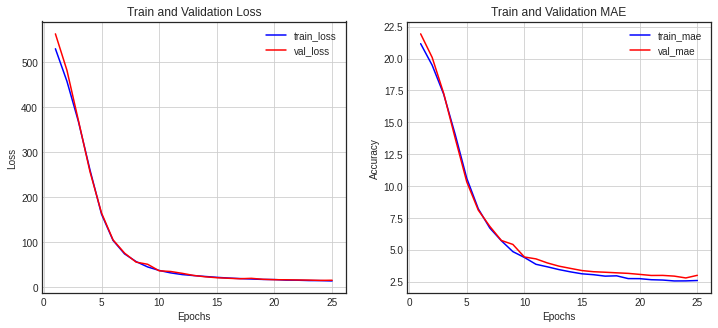

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
- 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
results = model.evaluate(test_data, test_labels)
print("test loss, test acc:", results)

4/4 [==============================] - 0s 2ms/step - loss: 20.4412 - mae: 3.3682
test loss, test acc: [20.441150665283203, 3.36824107170105]
